In [1]:
import sys
from pathlib import Path

home_path = Path().absolute().parent
sys.path.insert(0, str(home_path))

In [23]:
import pandas as pd
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)

In [3]:
from src.connector import get_connector
conn = get_connector()
conn.cursor().execute("use role MAXA_SNBX_CLT_FRESH")
conn.cursor().execute("use warehouse MAXA_SNBX_CLT_FRESH")
conn.cursor().execute("use database MAXA_SNBX_CLT_FRESH")

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://accounts.google.com/o/saml2/idp?idpid=C00ngl0kf&SAMLRequest=nZJLb%2BMgFEb%2FisWsbbDjaKYoTpSH0kbqI3KcUdvNiAJxUDA4gOu0v36I3UidRbuYhSULzr0c%2BO5ocqpk8MqNFVplII4QCLiimglVZmBbLMNfILCOKEakVjwDb9yCyXhkSSVrPG3cXuX82HDrAt9IWdxtZKAxCmtihcWKVNxiR%2FFmeneLkwjh2minqZbgU8n3FcRabpw3vJQwK7ze3rkaQ9i2bdQOIm1KmCCEILqCnjojPy78yd%2FpCz6GKD3znvD4%2BsNtJlT%2FBN9pvfSQxTdFsQ7XD5sCBNOL6lwr21TcbLh5FZRv89tewHqDipxISN4bw%2F9QoggjlCtniIys0u1OkgOnuqob55tH%2Fg%2FuOINSl8Lff7XIQH0QbPc8lC%2Bofqiui%2FR4vE%2BO%2BdNs%2F0Ty5eNjfj2U25v35X62NfO7qy0Fwe9LwMk54JW1DV%2Bpc6zOL6EkDVESoriIhzgd4sEg%2BpkOnkGw8LEKRVxXeXEnlOpGORuVWpeSd34anjNMoGD1xH%2BCZXOEVCnRYQf6WcHdmWb8ny8wgp%2BbfEzfvQ9ktVhrKehbsNSmIu7rvOIo7lYEC3cdinlFhJwyZri1PjcpdTs3nDg%2F5M40HMBxf%2Bq%2FYz7%2BCw%3D%3D&RelayState=5

AttributeError: 'DatetimeIndexResampler' object has no attribute 'pad'

In [57]:
def pad_timeseries(df: pd.DataFrame, date_col: str):
    df[date_col] = pd.to_datetime(df[date_col])
    min_date = df[date_col].min()
    max_date = df[date_col].max()
    date_range = pd.date_range(start=min_date, end=max_date, freq='D').to_frame().reset_index(drop=True). rename(columns={})
    return date_range

In [58]:
pad_timeseries(d, date_col='DATE')

,0
0,2020-01-03
1,2020-01-04
2,2020-01-05
3,2020-01-06
4,2020-01-07
...,...
1464,2024-01-06
1465,2024-01-07
1466,2024-01-08
1467,2024-01-09


In [7]:
# as of july 2023
CHURN_LIST_CARD = [
    '10347016',
    '10222044',
    '10176050',
    '10177037',
    '10380659',
    '10154246',
    '10182984',
    '10164299',
    '10183540',
    '10221484',
    '10155053',
    '10163745',
    '10199750',
    '10183920',
    '10408381',
]

# as of august 2023
CHURN_LIST_COMM = [
    '10334738',
    '10333443',
    '10189732',
    '10150877',
    '10189469',
    '10155500',
    '10355567',
    '10355126',
    '10322900',
    '10356403',
    '10356688',
    '10355932',
    '10356789',
    '10410266',
    '10364920',
    '10357016',
    '10364916',
    '10364925',
    '10364929',
    '10364914',
    '10364934',
    '10356140',
    '10357708',
    '10356803',
    '10357147',
    '10357662',
    '10357703'
]

In [5]:
# tables:
TABLE_CHURN_DETAILS = "MAXA_SNBX_CLT_FRESH.SNBX_DATA_MART_OSTAP_ANDRUSIV.MART_CUSTOMER_CHURN_DAILY"
TABLE_CUSTOMER_SALES = "MAXA_SNBX_CLT_FRESH.SNBX_DATA_MART_OSTAP_ANDRUSIV.MART_CUSTOMER_SALES" # ALL TRANSACTIONS
TABLE_CUSTOMER_SALES_DAILY = "MAXA_SNBX_CLT_FRESH.SNBX_DATA_MART_OSTAP_ANDRUSIV.MART_CUSTOMER_SALES_DAILY" # DAILY TRANSACTIONS
TABLE_CUSTOMER_DETAILS = "MAXA_SNBX_CLT_FRESH.SNBX_DATA_MART_OSTAP_ANDRUSIV.STG_FRESH_B2B_CUSTOMERS"

In [10]:
query_sample_table = f"""SELECT * FROM {TABLE_CUSTOMER_SALES_DAILY} LIMIT 100"""
df_sample_table = pd.read_sql_query(query_sample_table, conn)

/var/folders/7h/6w78g54x287d9lv_yttdyxdc0000gn/T/ipykernel_91159/3198035066.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sample_table = pd.read_sql_query(query_sample_table, conn)


In [12]:
df_sample_table.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 106 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    DATE_TRANSACTION                       object 
 1    BILLED_CUSTOMER_ID                     object 
 2    NUM_INVOICES                           int64  
 3    NUM_TRANSPORTERS                       int64  
 4    NUM_LOCATIONS                          int64  
 5    AMOUNT                                 float64
 6    VOLUME                                 float64
 7    AMOUNT_POSITIVE                        float64
 8    AMOUNT_NEGATIVE                        float64
 9    VOLUME_LT                              float64
 10   VOLUME_UN                              float64
 11   VOLUME_KN                              float64
 12   VOLUME_LINE_100_ENERGY                 float64
 13   VOLUME_LINE_200_LUBRICANTS             float64
 14   VOLUME_LINE_300_SPECIAL_PRODUCTS       fl

In [15]:
df_sample_table.head()

,DATE_TRANSACTION,BILLED_CUSTOMER_ID,NUM_INVOICES,NUM_TRANSPORTERS,NUM_LOCATIONS,AMOUNT,VOLUME,AMOUNT_POSITIVE,AMOUNT_NEGATIVE,VOLUME_LT,VOLUME_UN,VOLUME_KN,VOLUME_LINE_100_ENERGY,VOLUME_LINE_200_LUBRICANTS,VOLUME_LINE_300_SPECIAL_PRODUCTS,VOLUME_LINE_400_CONVENIENCE_STORE,VOLUME_CATEGORY_AUT_OTHERS,VOLUME_CATEGORY_AVI_AVIATION,VOLUME_CATEGORY_CVL_CVL,VOLUME_CATEGORY_DEF_DEF,VOLUME_CATEGORY_DIS_DISTILLATE,VOLUME_CATEGORY_EQU_EQUIPMENT,VOLUME_CATEGORY_ESS_GASOLINE,VOLUME_CATEGORY_GRA_GREASE,VOLUME_CATEGORY_HYG_HYDROGEN,VOLUME_CATEGORY_IND_INDUSTRIAL,VOLUME_CATEGORY_PCH_CHEMICALS,VOLUME_CATEGORY_PEM_PACKAGINGPRODUCTS,VOLUME_CATEGORY_PRO_PROPANE,VOLUME_CATEGORY_PVL_PVL,AGG_INVOICES,AGG_TRANSPORTERS,AGG_LOCATIONS,CUSTOMER_ID,CUSTOMER_CODE,CUSTOMER_NAME,MIDDLENAME,LANGUAGE,CRITERIA,TYPE_CODE,TYPE_NAME,KIND,SUB_TYPE_CODE,SUB_TYPE_NAME,SUB_TYPE,TYPE_SUPPLY_CODE,TYPE_SUPPLY_NAME,TYPE_SUPPLY,BANNER_CODE,BANNER_NAME,BANNER,REGION_ADMINISTRATIVE_CODE,ADMINISTRATIVE_REGION_NAME,ADMINISTRATIVE_REGION,ORIGIN_CODE,ORIGIN_NAME,ORIGIN,SERVICE_CODE,SERVICE_NAME,SERVICE,OFFICE_REGIONAL_CODE,OFFICE_REGIONAL_NAME,OFFICE_REGIONAL,GROUP_CODE,GROUP_NAME,BAND,IS_SUPPLIER,IS_CUSTOMER,IS_EMPLOYED,IS_DEPOSIT,BILLED_CODE,REPRESENTATIVE1_CODE,REPRESENTATIVE1_NAME,REPRESENTATIVE2_CODE,REPRESENTATIVE2_NAME,PROVINCE_OR_STATE,COUNTRY,MINIMUM_AGREED_SHIPPED_QUANTITY,PRODUCT_RESTRICTION_CODE,RESTRICTION_OF_PRODUCT_NAME,PRODUCT_RESTRICTION,IS_CORPORATIVE,TYPE_ORIGINAL_CODE,TYPE_ORIGINAL_NAME,TYPE_ORIGINAL,TYPE_PROCUREMENT_ORIGINAL_CODE,TYPE_SUPPLY_ORIGINAL_NAME,TYPE_SUPPLY_ORIGINAL,SERVICE_ORIGINAL_CODE,SERVICE_ORIGINAL_NAME,SERVICE_ORIGINAL,SUB_TYPE_CLIENT_CODE,SUB_TYPE_CUSTOMER_NAME,SUB_TYPE_CUSTOMER,ACCOUNT_OPENING_DATE,IS_INTERCO,IS_ACTIVE_MARKETING,IS_RETAILER,IS_COMMERCIAL,IS_RESIDENTIAL,IS_RESELLER,IS_ASSIGNED,IS_CARDLOCK,CLASSIFICATION_CODE,CLASSIFICATION_NAME,CLASSIFICATION
0,2020-01-09,"[214, 44, 67, 93, 81, 95, 140, 162, 222, 228, ...",1,1,1,58.02,60.000,58.02,NaN,60.000,NaN,NaN,60.000,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,60.000,NaN,None,NaN,NaN,NaN,NaN,None,"[\n ""26433298""\n]","[\n ""A46C3B54F2C9871CD81DAF7A932499C0""\n]","[\n ""CF9FA8220C823A953CD118F1AD18B89A""\n]","[214, 44, 67, 93, 81, 95, 140, 162, 222, 228, ...",10108039,Grégoire Allaire (IF),Inactif,F,CB,,.,- .,,.,- .,,.,- .,,.,- .,04,Mauricie,04 - Mauricie,,Harnois,- Harnois,,.,- .,,.,- .,,.,- .,Non,Oui,Non,Non,10108039,068,Josée Lambert,068,Josée Lambert,Québec,Canada,0.0,0,,0,Non,,.,- .,,.,- .,,.,- .,,.,- .,2012-06-04,Non,0,0,1,0,0,0,1,COM,Commercial,COM - Commercial
1,2023-11-21,"[251, 251, 239, 117, 248, 187, 137, 136, 208, ...",2,2,2,25520.76,15910.600,25520.76,NaN,15910.600,NaN,NaN,15910.600,NaN,NaN,None,NaN,NaN,NaN,NaN,15910.600,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,"[\n ""36093438"",\n ""36091339""\n]","[\n ""FA1F1BD73AB866CCBADBA188B6EEEDE2"",\n ""A...","[\n ""3FA951983DCEB752A36D1B387F590ECD"",\n ""9...","[251, 251, 239, 117, 248, 187, 137, 136, 208, ...",10201301,Les Chantiers Du lac inc.,,F,CB,,.,- .,,.,- .,,.,- .,,.,- .,01,Bas-Saint-Laurent,01 - Bas-Saint-Laurent,27,Turmel,27 - Turmel,,.,- .,11,Bureau de Cabano,11 - Bureau de Cabano,,.,- .,Non,Oui,Non,Non,10201301,101,Jean-Luc Lebrasseur,101,Jean-Luc Lebrasseur,Québec,Canada,0.0,,Aucune Restriction,- Aucune Restriction,Non,,.,- .,,.,- .,,.,- .,,.,- .,2019-04-20,Non,1,0,1,0,0,0,1,COM,Commercial,COM - Commercial
2,2023-05-14,"[133, 254, 231, 180, 150, 203, 103, 147, 44, 6...",1,1,1,45.39,35.365,45.39,NaN,35.365,NaN,NaN,35.365,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,35.365,NaN,None,NaN,NaN,NaN,NaN,None,"[\n ""34397367""\n]","[\n ""A46C3B54F2C9871CD81DAF7A932499C0""\n]","[\n ""3F78359C5F0A243959B341805EA6D70A""\n]","[133, 254, 231, 180, 150, 203, 103, 147, 44, 6...",10126575,Célia Coté Nolette(IF),Énergies Express//inactif,F,CX,020,Commercial,020 - Commercial,,.,- .,,.,- .,,.,- .,14,Lanaudière,14 - Lanaudière,,Harnois,- Harnois,CDE,Cardlock Diesel Express,CDE - Cardlock Diesel Express,01,Bureau St-Thomas,01 - Bureau St-Thomas,,.,- .,Ou

# Dive into one churned customer:

In [5]:
query = """
select
    customer_code,
    customer_name,
    date_transaction as date,
    date_trunc(week, date) as date_weekly,
    date_trunc(month, date) as date_monhtly,
    weekofyear(date) as week,
    month(date) as month,
    year(date) as year,
    dayofweek(date) as day_of_week,
    num_invoices,
    num_transporters,
    num_locations,
    amount,
    volume,
    volume_lt,
    volume_kn,
    volume_un,
    region_administrative_code,
    representative1_code,
    representative1_name,
    account_opening_date,
    classification_code,
    classification_name,
    iff(VOLUME_LINE_100_ENERGY is null, 0, 1) as line_100,
    iff(VOLUME_LINE_200_LUBRICANTS is null, 0, 1) as line_200,
    iff(VOLUME_LINE_300_SPECIAL_PRODUCTS is null, 0, 1) as line_300,
    iff(VOLUME_LINE_400_CONVENIENCE_STORE is null, 0, 1) as line_400
from MAXA_SNBX_CLT_FRESH.SNBX_DATA_MART_OSTAP_ANDRUSIV.MART_CUSTOMER_SALES_DAILY as t
where volume_un is null
and volume_kn is null
and classification_code in ('CLK', 'COM');
"""
df = pd.read_sql_query(query, conn)

/var/folders/7h/6w78g54x287d9lv_yttdyxdc0000gn/T/ipykernel_3027/4277076268.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


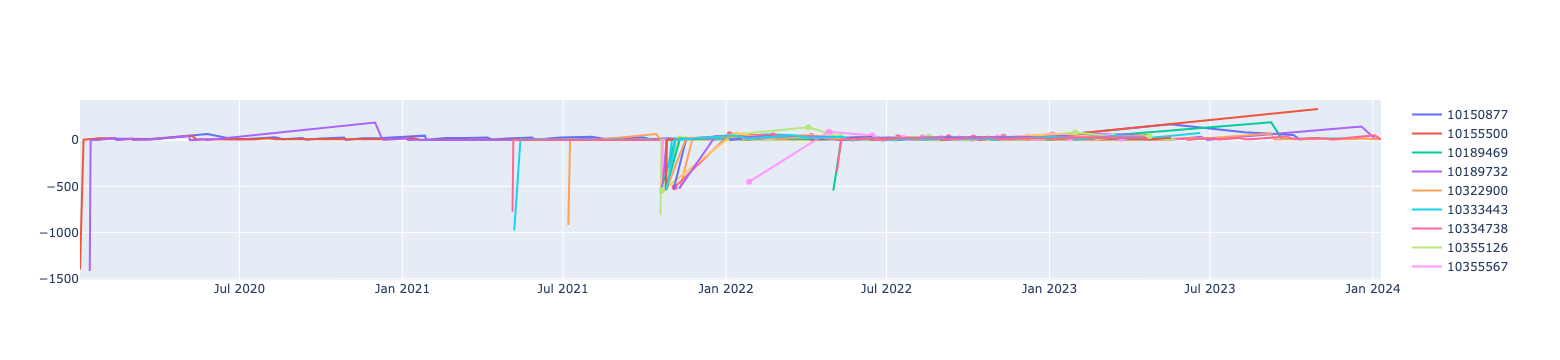

In [44]:
# daily analysis
d = (
    df
    [lambda _d: _d.CUSTOMER_CODE.isin(CHURN_LIST_COMM)] # filter customers
    [lambda _d: pd.to_datetime(_d.DATE) > '2020-01-01'] # filter customers
    .sort_values(['CUSTOMER_CODE', 'DATE'])
    .assign(DATE= lambda _d: pd.to_datetime(_d.DATE))
    .assign(recency=lambda _d: _d.DATE.diff().dt.days)
    .assign(recency_l2w_mean = lambda _d: _d.groupby('CUSTOMER_CODE').recency.rolling(window=7, min_periods=1).mean().reset_index(drop=True))
    
)


data = [
    go.Scatter(x=d[lambda _d: _d.CUSTOMER_CODE == o]['DATE'], y=d[lambda _d: _d.CUSTOMER_CODE == o]['recency'], name=o) for o in d.CUSTOMER_CODE.unique()  
] +  \
[
    go.Scatter(x=d[lambda _d: _d.CUSTOMER_CODE == o]['DATE'], y=d[lambda _d: _d.CUSTOMER_CODE == o]['recency_l2w_mean'], name=o + '_ma2') for o in d.CUSTOMER_CODE.unique()
]

fig = go.Figure(data)
fig.show()

In [46]:
d[lambda _d: _d.CUSTOMER_CODE== '10357703']

,CUSTOMER_CODE,CUSTOMER_NAME,DATE,DATE_WEEKLY,DATE_MONHTLY,WEEK,MONTH,YEAR,DAY_OF_WEEK,NUM_INVOICES,NUM_TRANSPORTERS,NUM_LOCATIONS,AMOUNT,VOLUME,VOLUME_LT,VOLUME_KN,VOLUME_UN,REGION_ADMINISTRATIVE_CODE,REPRESENTATIVE1_CODE,REPRESENTATIVE1_NAME,ACCOUNT_OPENING_DATE,CLASSIFICATION_CODE,CLASSIFICATION_NAME,LINE_100,LINE_200,LINE_300,LINE_400,recency,recency_l2w_mean
401955,10357703,"Ferme Franlie, S.E.N.C.",2022-01-27,2022-01-24,2022-01-01,4,1,2022,4,1,1,1,608.43,477.2,477.2,None,None,12,115,Katia Sylvestre,2021-10-07,COM,Commercial,1,0,0,0,-452.0,NaN
1822678,10357703,"Ferme Franlie, S.E.N.C.",2022-04-27,2022-04-25,2022-04-01,17,4,2022,3,1,1,1,778.87,452.7,452.7,None,None,12,115,Katia Sylvestre,2021-10-07,COM,Commercial,1,0,0,0,90.0,NaN
1005202,10357703,"Ferme Franlie, S.E.N.C.",2022-06-15,2022-06-13,2022-06-01,24,6,2022,3,2,1,1,4322.40,2527.4,2527.4,None,None,12,115,Katia Sylvestre,2021-10-07,COM,Commercial,1,0,0,0,49.0,NaN
227890,10357703,"Ferme Franlie, S.E.N.C.",2022-06-27,2022-06-27,2022-06-01,26,6,2022,1,1,1,1,1567.48,933.3,933.3,None,None,12,115,Katia Sylvestre,2021-10-07,COM,Commercial,1,0,0,0,12.0,NaN
1001801,10357703,"Ferme Franlie, S.E.N.C.",2022-07-20,2022-07-18,2022-07-01,29,7,2022,3,1,1,1,1557.67,1088.9,1088.9,None,None,12,115,Katia Sylvestre,2021-10-07,COM,Commercial,1,0,0,0,23.0,NaN
1333504,10357703,"Ferme Franlie, S.E.N.C.",2022-08-11,2022-08-08,2022-08-01,32,8,2022,4,1,1,1,1824.27,1385.7,1385.7,None,None,12,115,Katia Sylvestre,2021-10-07,COM,Commercial,1,0,0,0,22.0,NaN
161397,10357703,"Ferme Franlie, S.E.N.C.",2022-09-01,2022-08-29,2022-09-01,35,9,2022,4,1,1,1,311.98,218.4,218.4,None,None,12,115,Katia Sylvestre,2021-10-07,COM,Commercial,1,0,0,0,21.0,NaN
1409113,10357703,"Ferme Franlie, S.E.N.C.",2022-09-21,2022-09-19,2022-09-01,38,9,2022,3,1,1,1,618.62,500.3,500.3,None,None,12,115,Katia Sylvestre,2021-10-07,COM,Commercial,1,0,0,0,20.0,NaN
1209741,10357703,"Ferme Franlie, S.E.N.C.",2022-10-06,2022-10-03,2022-10-01,40,10,2022,4,1,1,1,2696.35,1663.9,1663.9,None,None,12,115,Katia Sylvestre,2021-10-07,COM,Commercial,1,0,0,0,15.0,NaN
1273692,10357703,"Ferme Franlie, S.E.N.C.",2022-11-03,2022-10-31,2022-11-01,44,11,2022,4,1,1,1,4149.80,2224.5,2224.5,None,None,12,115,Katia Sylvestre,2021-10-07,COM,Commercial,1,0,0,0,28.0,NaN


In [8]:
df_res = (
    df
    [lambda _d: _d.CUSTOMER_CODE.isin(CHURN_LIST_COMM)]
    .sort_values(['CUSTOMER_CODE', 'DATE'])
    .assign(recency= lambda x: pd.to_datetime(x.DATE).diff().dt.days)
    .groupby(['CUSTOMER_CODE', 'DATE_WEEKLY'])
    .agg(
        volume=('VOLUME', 'sum'),
        frequency= ('VOLUME', 'count'),
        recency=('recency', 'last')
    )
    .sort_values(['CUSTOMER_CODE', 'DATE_WEEKLY'])
    .reset_index()
    .assign(
        cumulative_mean=lambda _d: _d.groupby('CUSTOMER_CODE').volume.expanding().mean().reset_index(drop=True),
        cumulative_std=lambda _d: _d.groupby('CUSTOMER_CODE').volume.expanding().std().reset_index(drop=True),
        ma_1_mean=lambda _d: _d.groupby('CUSTOMER_CODE').volume.rolling(window=1).mean().reset_index(drop=True),
        ma_2_mean=lambda _d: _d.groupby('CUSTOMER_CODE').volume.rolling(window=2).mean().reset_index(drop=True),
        ma_3_mean=lambda _d: _d.groupby('CUSTOMER_CODE').volume.rolling(window=3).mean().reset_index(drop=True),
        ma_4_mean=lambda _d: _d.groupby('CUSTOMER_CODE').volume.rolling(window=4).mean().reset_index(drop=True),
        ma_5_mean=lambda _d: _d.groupby('CUSTOMER_CODE').volume.rolling(window=5).mean().reset_index(drop=True),
        ma_6_mean=lambda _d: _d.groupby('CUSTOMER_CODE').volume.rolling(window=6).mean().reset_index(drop=True),
        ma_9_mean=lambda _d: _d.groupby('CUSTOMER_CODE').volume.rolling(window=9).mean().reset_index(drop=True),
        ma_12_mean=lambda _d: _d.groupby('CUSTOMER_CODE').volume.rolling(window=12).mean().reset_index(drop=True),
        ma_3_std=lambda _d: _d.groupby('CUSTOMER_CODE').volume.rolling(window=3).std().reset_index(drop=True),
        ma_6_std=lambda _d: _d.groupby('CUSTOMER_CODE').volume.rolling(window=6).std().reset_index(drop=True),
        ma_9_std=lambda _d: _d.groupby('CUSTOMER_CODE').volume.rolling(window=9).std().reset_index(drop=True),
        ma_12_std=lambda _d: _d.groupby('CUSTOMER_CODE').volume.rolling(window=12).std().reset_index(drop=True),
        rf = lambda _d: _d.recency*_d.frequency,
        recency_cum_mean = lambda _d: _d.groupby('CUSTOMER_CODE').recency.expanding().mean().reset_index(drop=True),
        recency_cum_std = lambda _d: _d.groupby('CUSTOMER_CODE').recency.expanding().std().reset_index(drop=True),
        frequency_cum_mean = lambda _d: _d.groupby('CUSTOMER_CODE').frequency.expanding().mean().reset_index(drop=True),
        frequency_cum_std = lambda _d: _d.groupby('CUSTOMER_CODE').frequency.expanding().std().reset_index(drop=True),
        rf_cum_mean = lambda _d: _d.groupby('CUSTOMER_CODE').rf.expanding().mean().reset_index(drop=True),
        rf_cum_std = lambda _d: _d.groupby('CUSTOMER_CODE').rf.expanding().std().reset_index(drop=True),
    )
    .rename(columns={'DATE_WEEKLY':'DATE'})
    

    
)
df_res

,CUSTOMER_CODE,DATE,volume,frequency,recency,cumulative_mean,cumulative_std,ma_1_mean,ma_2_mean,ma_3_mean,ma_4_mean,ma_5_mean,ma_6_mean,ma_9_mean,ma_12_mean,ma_3_std,ma_6_std,ma_9_std,ma_12_std,rf,recency_cum_mean,recency_cum_std,frequency_cum_mean,frequency_cum_std,rf_cum_mean,rf_cum_std
0,10150877,2017-05-15,36033.0,1,NaN,36033.000000,NaN,36033.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,10150877,2017-06-12,34968.0,1,27.0,35500.500000,753.068722,34968.0,35500.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,27.000000,NaN,1.0,0.0,27.000000,NaN
2,10150877,2017-07-03,34950.0,1,22.0,35317.000000,620.139500,34950.0,34959.00,35317.000000,NaN,NaN,NaN,NaN,NaN,620.139500,NaN,NaN,NaN,22.0,24.500000,3.535534,1.0,0.0,24.500000,3.535534
3,10150877,2017-07-24,31954.0,1,20.0,34476.250000,1756.082074,31954.0,33452.00,33957.333333,34476.250,NaN,NaN,NaN,NaN,1734.960903,NaN,NaN,NaN,20.0,23.000000,3.605551,1.0,0.0,23.000000,3.605551
4,10150877,2017-08-14,32971.0,1,21.0,34175.200000,1663.136705,32971.0,32462.50,33291.666667,33710.750,34175.20,NaN,NaN,NaN,1523.523657,NaN,NaN,NaN,21.0,22.500000,3.109126,1.0,0.0,22.500000,3.109126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,10410266,2023-01-02,565.1,1,16.0,2012.127778,1029.535991,565.1,614.15,1461.333333,1607.375,1494.36,1847.400000,2071.766667,2141.775000,1468.184152,1308.558939,1091.311455,1085.520488,16.0,-5.722222,85.158541,1.0,0.0,-5.722222,85.158541
1481,10410266,2023-01-23,2178.7,1,21.0,2020.894737,1001.258653,2178.7,1371.90,1135.666667,1640.675,1721.64,1608.416667,2042.477778,2059.833333,904.624123,1021.056603,1083.634208,1037.559776,21.0,-4.315789,82.985978,1.0,0.0,-4.315789,82.985978
1482,10410266,2023-02-20,1191.1,1,29.0,1979.405000,992.059829,1191.1,1684.90,1311.633333,1149.525,1550.76,1633.216667,1872.722222,1908.025000,813.524710,1006.256211,1084.092324,1018.547811,29.0,-2.650000,81.115431,1.0,0.0,-2.650000,81.115431
1483,10410266,2023-03-20,1726.5,1,27.0,1967.361905,968.513979,1726.5,1458.80,1698.766667,1415.350,1264.92,1580.050000,1797.855556,1978.516667,494.383751,988.384730,1066.222702,969.046222,27.0,-1.238095,79.325850,1.0,0.0,-1.238095,79.325850


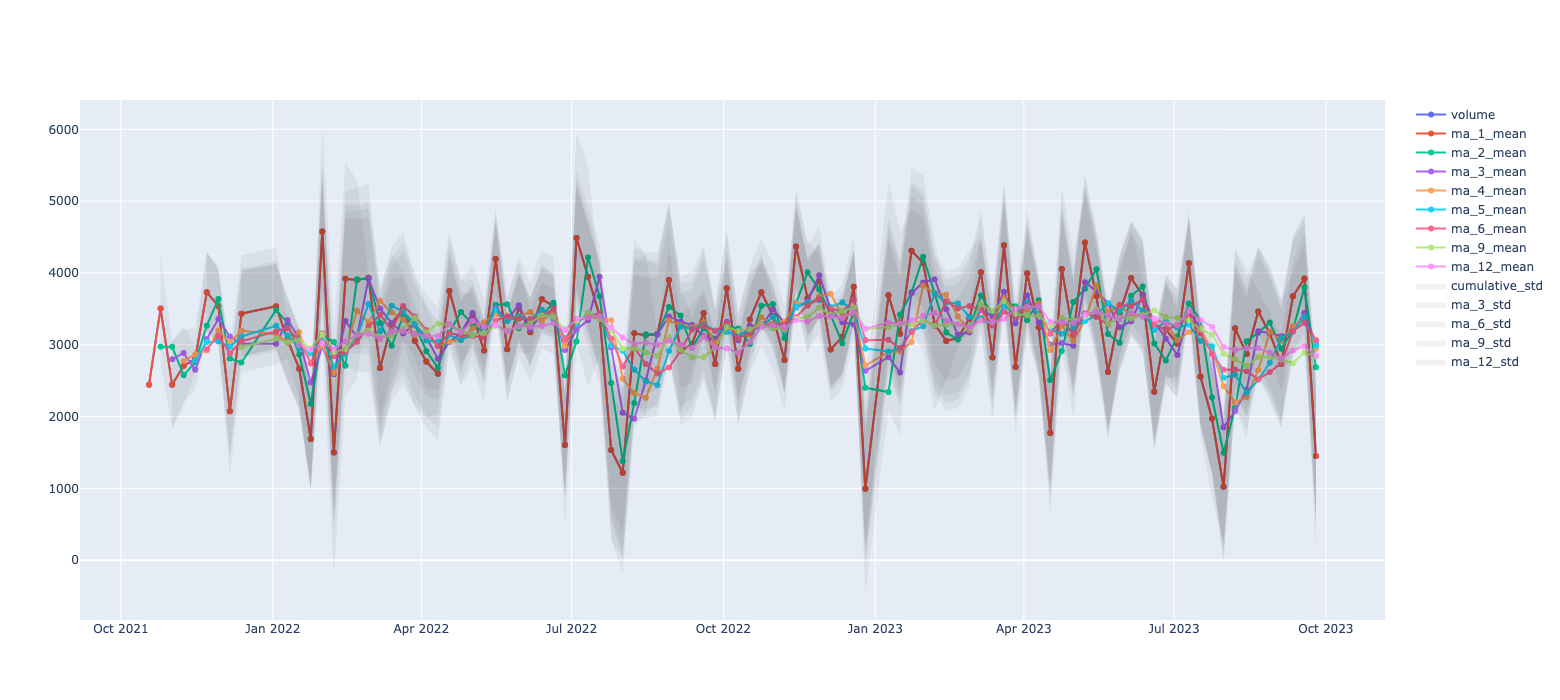

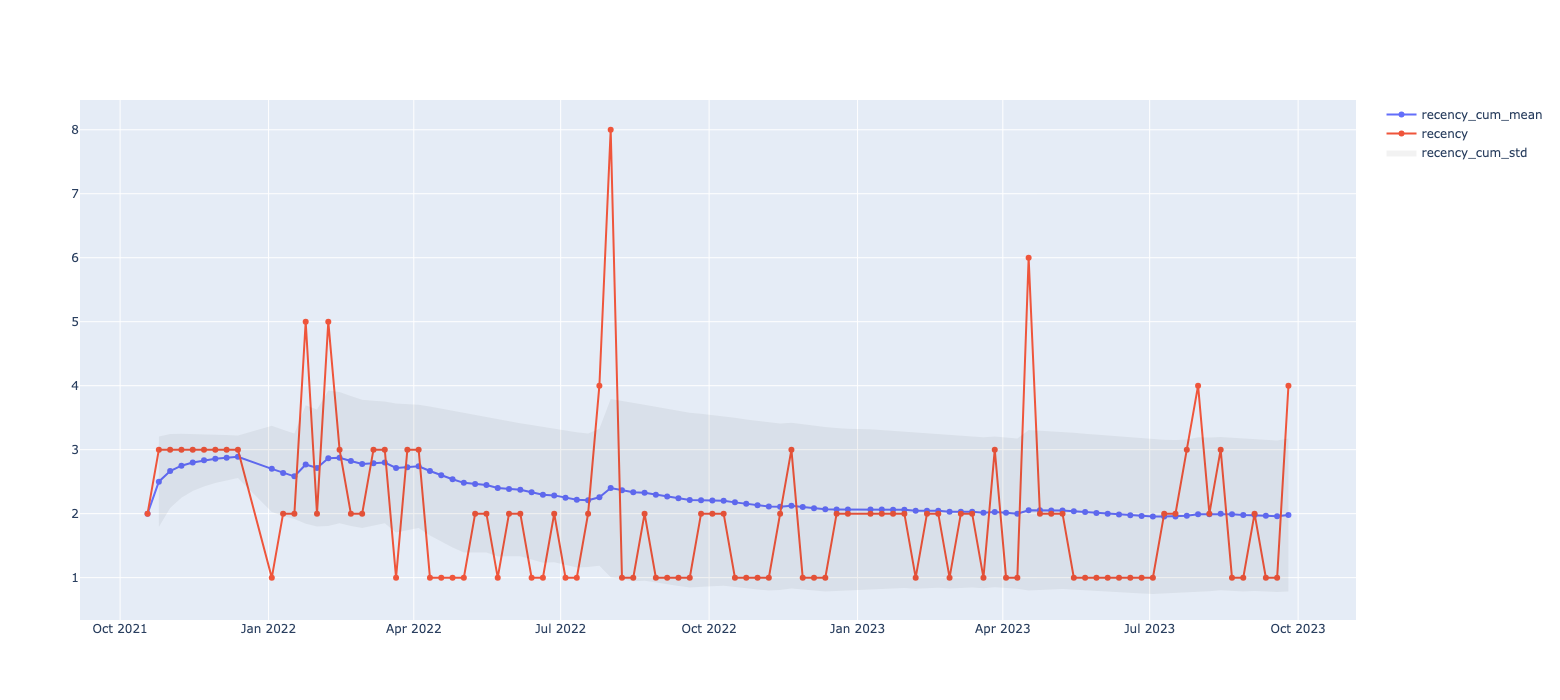

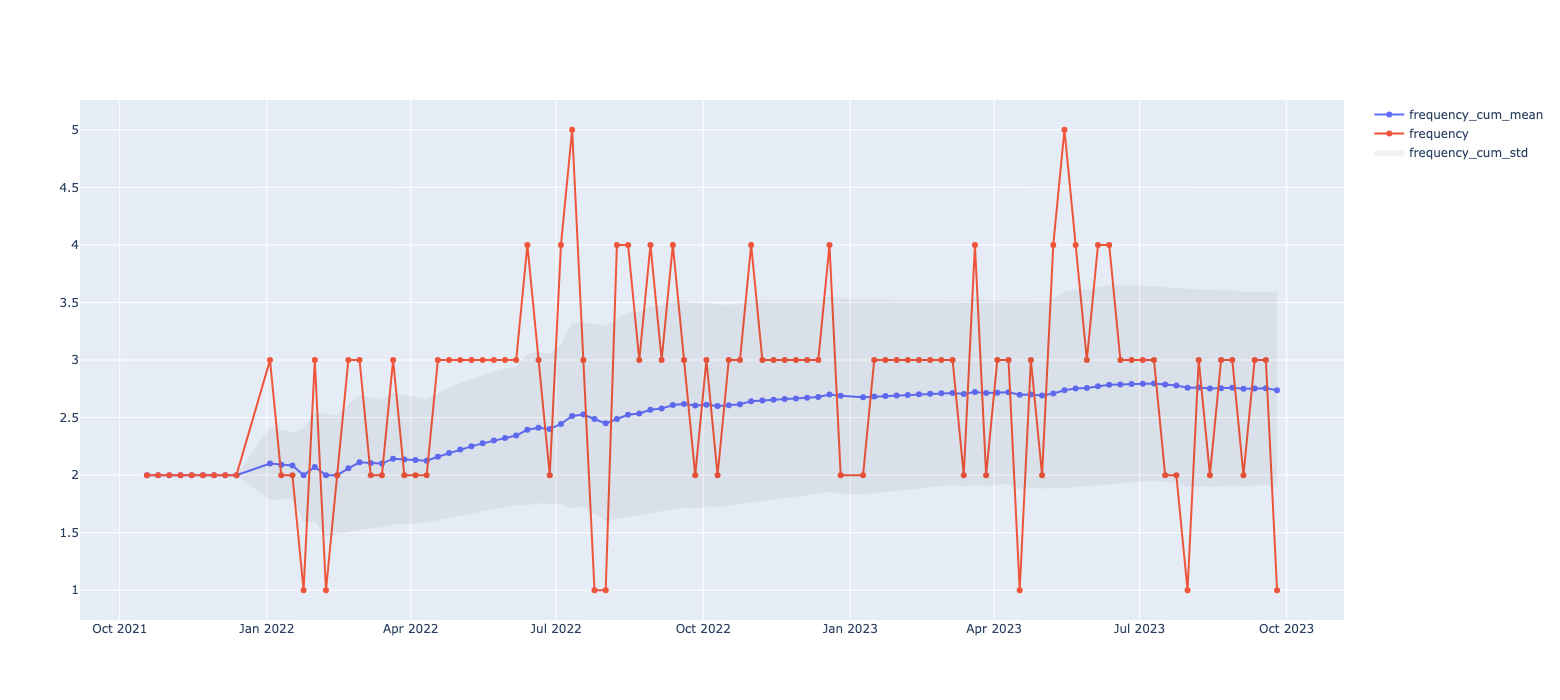

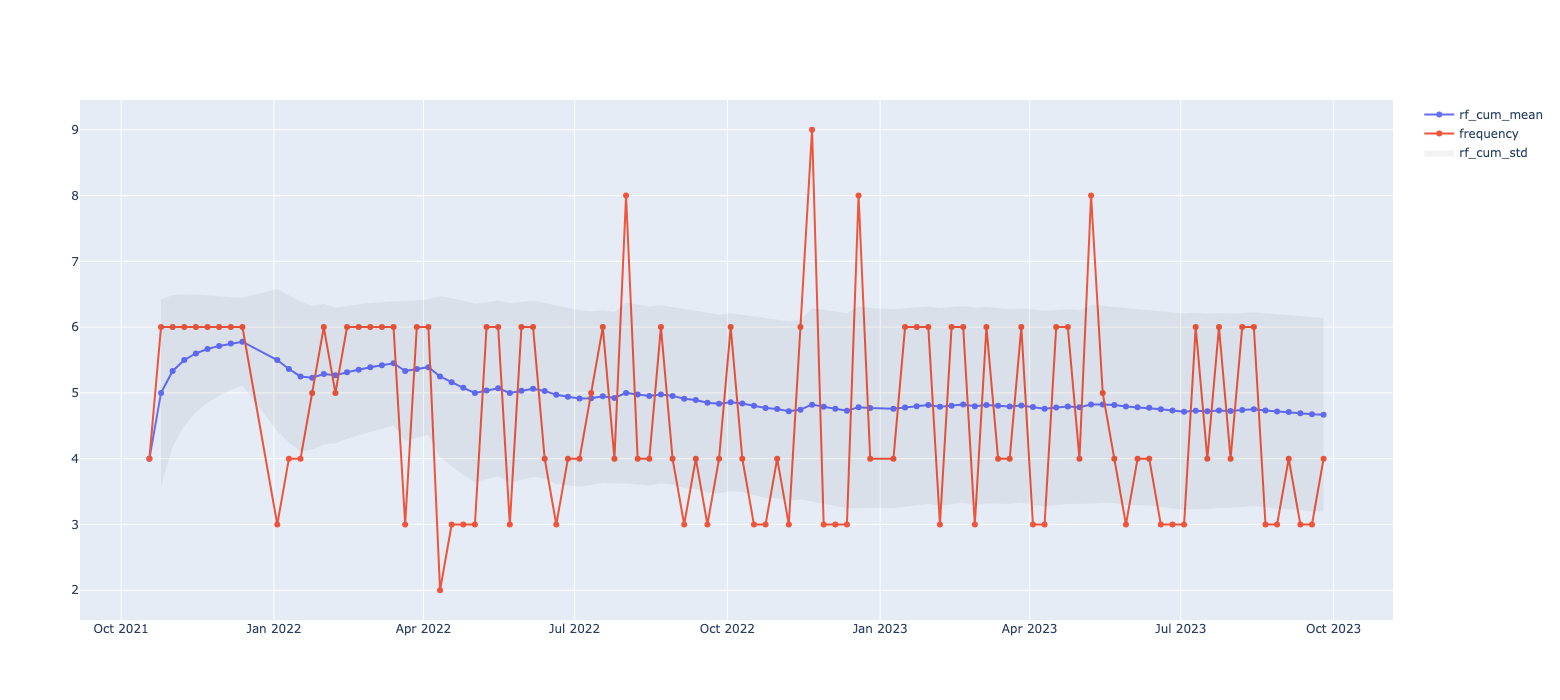

In [211]:
multiplier = 1
traces = [
    go.Scatter(x=df_res['DATE'], y=df_res['volume'], mode='lines+markers', name='volume'),
    go.Scatter(x=df_res['DATE'], y=df_res['ma_1_mean'], mode='lines+markers', name='ma_1_mean'),
    go.Scatter(x=df_res['DATE'], y=df_res['ma_2_mean'], mode='lines+markers', name='ma_2_mean'),
    go.Scatter(x=df_res['DATE'], y=df_res['ma_3_mean'], mode='lines+markers', name='ma_3_mean'),
    go.Scatter(x=df_res['DATE'], y=df_res['ma_4_mean'], mode='lines+markers', name='ma_4_mean'),
    go.Scatter(x=df_res['DATE'], y=df_res['ma_5_mean'], mode='lines+markers', name='ma_5_mean'),
    go.Scatter(x=df_res['DATE'], y=df_res['ma_6_mean'], mode='lines+markers', name='ma_6_mean'),
    go.Scatter(x=df_res['DATE'], y=df_res['ma_9_mean'], mode='lines+markers', name='ma_9_mean'),
    go.Scatter(x=df_res['DATE'], y=df_res['ma_12_mean'], mode='lines+markers', name='ma_12_mean'),


    go.Scatter(
            x=df_res['DATE'].tolist() + df_res['DATE'].iloc[::-1].tolist(),
            y=  (df_res['volume'] + multiplier * df_res['cumulative_std'] ).tolist()  + (df_res['volume'] - multiplier * df_res['cumulative_std'] ).iloc[::-1].tolist(),
            fill='toself',
            fillcolor='rgba(0,0,0,0.05)',  # Light shade of gray with some transparency
            line=dict(color='rgba(255,255,255,0)'), 
            name='cumulative_std'
    ),
    
    go.Scatter(
            x=df_res['DATE'].tolist() + df_res['DATE'].iloc[::-1].tolist(),
            y=  (df_res['volume'] + multiplier * df_res['ma_3_std'] ).tolist()  + (df_res['volume'] - multiplier * df_res['ma_3_std'] ).iloc[::-1].tolist(),
            fill='toself',
            fillcolor='rgba(0,0,0,0.05)',  # Light shade of gray with some transparency
            line=dict(color='rgba(255,255,255,0)'), 
            name='ma_3_std'
    ),

    go.Scatter(
            x=df_res['DATE'].tolist() + df_res['DATE'].iloc[::-1].tolist(),
            y=  (df_res['volume'] + multiplier * df_res['ma_6_std'] ).tolist()  + (df_res['volume'] - multiplier * df_res['ma_6_std'] ).iloc[::-1].tolist(),
            fill='toself',
            fillcolor='rgba(0,0,0,0.05)',  # Light shade of gray with some transparency
            line=dict(color='rgba(255,255,255,0)'), 
            name='ma_6_std'
    ),

    go.Scatter(
            x=df_res['DATE'].tolist() + df_res['DATE'].iloc[::-1].tolist(),
            y=  (df_res['volume'] + multiplier * df_res['ma_9_std'] ).tolist()  + (df_res['volume'] - multiplier * df_res['ma_9_std'] ).iloc[::-1].tolist(),
            fill='toself',
            fillcolor='rgba(0,0,0,0.05)',  # Light shade of gray with some transparency
            line=dict(color='rgba(255,255,255,0)'), 
            name='ma_9_std'
    ),

    go.Scatter(
            x=df_res['DATE'].tolist() + df_res['DATE'].iloc[::-1].tolist(),
            y=  (df_res['volume'] + multiplier * df_res['ma_12_std'] ).tolist()  + (df_res['volume'] - multiplier * df_res['ma_12_std'] ).iloc[::-1].tolist(),
            fill='toself',
            fillcolor='rgba(0,0,0,0.05)',  # Light shade of gray with some transparency
            line=dict(color='rgba(255,255,255,0)'), 
            name='ma_12_std'
    ),
    
]
fig = go.Figure(data=traces)
fig.update_layout(
    autosize=False,
    width=1800,
    height=700,
)

fig.show()

# recency
traces =[
    go.Scatter(x=df_res['DATE'], y=df_res['recency_cum_mean'], mode='lines+markers', name='recency_cum_mean'),
    go.Scatter(x=df_res['DATE'], y=df_res['recency'], mode='lines+markers', name='recency'),
    go.Scatter(
            x=df_res['DATE'].tolist() + df_res['DATE'].iloc[::-1].tolist(),
            y=  (df_res['recency_cum_mean'] + multiplier * df_res['recency_cum_std'] ).tolist()  + (df_res['recency_cum_mean'] - multiplier * df_res['recency_cum_std'] ).iloc[::-1].tolist(),
            fill='toself',
            fillcolor='rgba(0,0,0,0.05)',  # Light shade of gray with some transparency
            line=dict(color='rgba(255,255,255,0)'), 
            name='recency_cum_std'
    ),
]


fig = go.Figure(data=traces)
fig.update_layout(
    autosize=False,
    width=1800,
    height=700,
)

fig.show()

# frequency
traces =[
    go.Scatter(x=df_res['DATE'], y=df_res['frequency_cum_mean'], mode='lines+markers', name='frequency_cum_mean'),
    go.Scatter(x=df_res['DATE'], y=df_res['frequency'], mode='lines+markers', name='frequency'),
    go.Scatter(
            x=df_res['DATE'].tolist() + df_res['DATE'].iloc[::-1].tolist(),
            y=  (df_res['frequency_cum_mean'] + multiplier * df_res['frequency_cum_std'] ).tolist()  + (df_res['frequency_cum_mean'] - multiplier * df_res['frequency_cum_std'] ).iloc[::-1].tolist(),
            fill='toself',
            fillcolor='rgba(0,0,0,0.05)',  # Light shade of gray with some transparency
            line=dict(color='rgba(255,255,255,0)'), 
            name='frequency_cum_std'
    ),
]



fig = go.Figure(data=traces)
fig.update_layout(
    autosize=False,
    width=1800,
    height=700,
)

fig.show()

# rf
traces =[
    go.Scatter(x=df_res['DATE'], y=df_res['rf_cum_mean'], mode='lines+markers', name='rf_cum_mean'),
    go.Scatter(x=df_res['DATE'], y=df_res['rf'], mode='lines+markers', name='frequency'),
    go.Scatter(
            x=df_res['DATE'].tolist() + df_res['DATE'].iloc[::-1].tolist(),
            y=  (df_res['rf_cum_mean'] + multiplier * df_res['rf_cum_std'] ).tolist()  + (df_res['rf_cum_mean'] - multiplier * df_res['rf_cum_std'] ).iloc[::-1].tolist(),
            fill='toself',
            fillcolor='rgba(0,0,0,0.05)',  # Light shade of gray with some transparency
            line=dict(color='rgba(255,255,255,0)'), 
            name='rf_cum_std'
    ),
]



fig = go.Figure(data=traces)
fig.update_layout(
    autosize=False,
    width=1800,
    height=700,
)

fig.show()